In [52]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv("Traffic_Accident .csv")

In [54]:
df.head(10)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
5,31-50,Male,Unknown,Unknown,Unknown,Unknown,Y Shape,Unknown,Daylight,Normal,Vehicle with vehicle collision,U-Turn,Not a Pedestrian,Overloading,2
6,18-30,Male,Junior high school,Employee,2-5yr,Undivided Two way,Crossing,Unknown,Daylight,Normal,Vehicle with vehicle collision,Moving Backward,Not a Pedestrian,Other,2
7,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,U-Turn,Not a Pedestrian,No priority to vehicle,2
8,18-30,Male,Junior high school,Employee,Above 10yr,other,Y Shape,Earth roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Crossing from driver's nearside,Changing lane to the right,2
9,18-30,Male,Junior high school,Employee,1-2yr,Undivided Two way,Y Shape,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,U-Turn,Not a Pedestrian,Moving Backward,1


In [55]:
df.shape

(12316, 15)

In [56]:
df.isnull().sum()

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

In [57]:
# for i in df.columns:
#     sns.boxplot(i)
#     plt.show()

In [58]:
df.drop(columns={"Educational_level"},inplace=True)

In [59]:
df

,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
12312,Unknown,Male,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2
12313,Over 51,Male,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1
12314,18-30,Female,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2


In [60]:
for i in df["Accident_severity"].unique(): 
    print(i,"=",len(df[df["Accident_severity"] == i]))

2 = 10415
1 = 1743
0 = 158


In [61]:
df_0s = df[df["Accident_severity"] == 0][:158]
df_1s = df[df["Accident_severity"] == 1][:158]
df_2s = df[df["Accident_severity"] == 2][:158]

In [62]:
df_new = pd.concat([df_0s,df_1s,df_2s]).reset_index() 

In [63]:
df_new

,index,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,89,31-50,Male,Employee,5-10yr,Double carriageway (median),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Reversing,Not a Pedestrian,Moving Backward,0
1,90,31-50,Male,Employee,Above 10yr,Two-way (divided with broken lines road marking),No junction,Earth roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Moving Backward,0
2,453,Over 51,Male,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Raining,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Moving Backward,0
3,523,31-50,Male,Employee,2-5yr,One way,Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Crossing from driver's nearside,No distancing,0
4,524,18-30,Male,Owner,2-5yr,Undivided Two way,Y Shape,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the right,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,182,31-50,Male,Employee,Above 10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Raining,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
470,183,31-50,Male,Employee,1-2yr,Undivided Two way,No junction,Asphalt roads,Daylight,Raining,Collision with pedestrians,Going straight,Not a Pedestrian,Other,2
471,184,18-30,Male,Employee,5-10yr,Undivided Two way,Y Shape,Other,Daylight,Normal,Collision with pedestrians,Moving Backward,Not a Pedestrian,No distancing,2
472,185,18-30,Male,Employee,5-10yr,Two-way (divided with broken lines road marking),Y Shape,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,No priority to pedestrian,2


In [64]:
df_new.drop(columns="index",inplace=True)

In [65]:
df_new.shape

(474, 14)

In [66]:
df_new[df_new["Accident_severity"] == 2]

,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
316,18-30,Male,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
317,31-50,Male,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
318,18-30,Male,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
319,18-30,Male,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
320,31-50,Male,Unknown,Unknown,Unknown,Y Shape,Unknown,Daylight,Normal,Vehicle with vehicle collision,U-Turn,Not a Pedestrian,Overloading,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,31-50,Male,Employee,Above 10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Raining,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
470,31-50,Male,Employee,1-2yr,Undivided Two way,No junction,Asphalt roads,Daylight,Raining,Collision with pedestrians,Going straight,Not a Pedestrian,Other,2
471,18-30,Male,Employee,5-10yr,Undivided Two way,Y Shape,Other,Daylight,Normal,Collision with pedestrians,Moving Backward,Not a Pedestrian,No distancing,2
472,18-30,Male,Employee,5-10yr,Two-way (divided with broken lines road marking),Y Shape,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,No priority to pedestrian,2


In [67]:
# df_new.drop(columns="level_0",inplace=True)
# df_new

In [68]:
data = df_new
y = data["Accident_severity"]
data.drop(columns={"Accident_severity"},inplace=True)
x = data

In [69]:
enc = ce.OrdinalEncoder(cols=df_new.columns)
x_transformed = enc.fit_transform(x)
x_transformed

,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,2,2,1,2,1,1,1,2,1,1
2,2,1,1,2,3,1,1,2,2,1,2,1,1
3,1,1,1,3,4,2,1,1,1,1,2,2,2
4,3,1,2,3,3,2,1,1,1,2,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,1,1,1,2,2,1,1,1,2,1,2,1,2
470,1,1,1,6,3,1,1,1,2,3,2,1,9
471,3,1,1,1,3,2,4,1,1,3,3,1,2
472,3,1,1,1,2,2,1,1,1,2,2,1,13


In [70]:
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.3,random_state=42)

In [72]:
x_train

,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
391,2,1,1,1,1,3,1,1,1,1,2,1,13
355,1,1,1,1,3,5,1,1,1,1,2,1,9
26,3,1,1,2,3,1,1,2,1,3,5,1,6
7,1,1,1,2,5,1,1,2,1,2,2,1,1
431,3,3,1,3,1,2,1,2,2,3,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2,1,1,6,5,1,1,2,2,1,2,1,5
270,2,1,1,1,2,2,6,1,1,2,3,1,2
348,3,1,1,2,2,2,1,1,1,1,2,4,2
435,3,1,1,1,3,2,1,1,1,1,2,1,2


In [73]:
x_test

,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
428,3,1,1,3,5,2,1,2,2,2,2,1,3
440,3,1,1,6,6,1,1,2,5,2,1,1,9
9,3,1,1,1,5,1,1,2,1,1,2,1,4
468,1,1,1,5,4,1,1,1,2,1,2,1,5
39,3,1,2,1,4,2,1,2,1,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,3,1,1,3,2,1,1,1,1,2,3,3,3
110,1,1,1,6,3,1,1,1,1,1,6,1,13
302,2,1,1,1,4,4,1,2,2,1,2,1,3
415,1,1,1,3,2,1,1,2,2,2,2,1,4


## Logistic Regression

In [74]:
model = LogisticRegression()

In [75]:
model.fit(x_train,y_train)

LogisticRegression()

In [76]:
model_pred = model.predict(x_test)

In [77]:
accuracy_score(y_test,model_pred)

0.45454545454545453

## KNN

In [78]:
model1 = KNeighborsClassifier(n_neighbors=7)

In [79]:
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [80]:
model1_pred = model1.predict(x_test)

In [81]:
accuracy_score(y_test,model1_pred)

0.44755244755244755

## Naive Bayes

In [82]:
model2 = MultinomialNB()

In [83]:
model2.fit(x_train,y_train)

MultinomialNB()

In [84]:
model2_pred = model2.predict(x_test)

In [85]:
accuracy_score(y_test,model2_pred)

0.40559440559440557

In [86]:
for i in df.columns:
    print(df[i].unique())
    print()

['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']

['Male' 'Female' 'Unknown']

['Employee' 'Unknown' 'Owner' 'Other']

['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'Unknown' 'No Licence' 'Below 1yr'
 'unknown']

['Unknown' 'Undivided Two way' 'other' 'Double carriageway (median)'
 'One way' 'Two-way (divided with solid lines road marking)'
 'Two-way (divided with broken lines road marking)']

['No junction' 'Y Shape' 'Crossing' 'O Shape' 'Other' 'Unknown' 'T Shape'
 'X Shape']

['Asphalt roads' 'Earth roads' 'Unknown'
 'Asphalt roads with some distress' 'Gravel roads' 'Other']

['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lights unlit']

['Normal' 'Raining' 'Raining and Windy' 'Cloudy' 'Other' 'Windy' 'Snow'
 'Unknown' 'Fog or mist']

['Collision with roadside-parked vehicles'
 'Vehicle with vehicle collision' 'Collision with roadside objects'
 'Collision with animals' 'Other' 'Rollover' 'Fall from vehicles'
 'Collision with pedestrians' 'With Train' 'Unknown']



# PREDICTION

In [98]:
new_data = {'Age_band_of_driver' : 'Under 18',
            'Sex_of_driver' : 'Female',
            'Vehicle_driver_relation' : 'Employee', 
            'Driving_experience' : 'Above 10yr', 
            'Lanes_or_Medians' : 'Undivided Two way',
            'Types_of_Junction' : 'Crossing', 
            'Road_surface_type' : 'Earth roads', 
            'Light_conditions' : 'Daylight',
            'Weather_conditions' : 'Normal', 
            'Type_of_collision' : 'Collision with roadside-parked vehicles', 
            'Vehicle_movement' : 'Going straight',
            'Pedestrian_movement' : 'Not a Pedestrian', 
            'Cause_of_accident' : 'Overtaking'}

new_data_array = pd.DataFrame(data=[new_data])

enc = ce.OrdinalEncoder(cols=df_new.columns)
enc.fit_transform(df_new)
new_data_transformed = enc.transform(new_data_array)

pred_new = model.predict(new_data_transformed)
pred_new1 = model1.predict(new_data_transformed)
pred_new2 = model2.predict(new_data_transformed)
print(pred_new)
print(pred_new1)
print(pred_new2)

[2]
[1]
[2]


In [88]:
df_new.to_csv("Traffic_Accident_new.csv",index=False)

# VISUALISATION

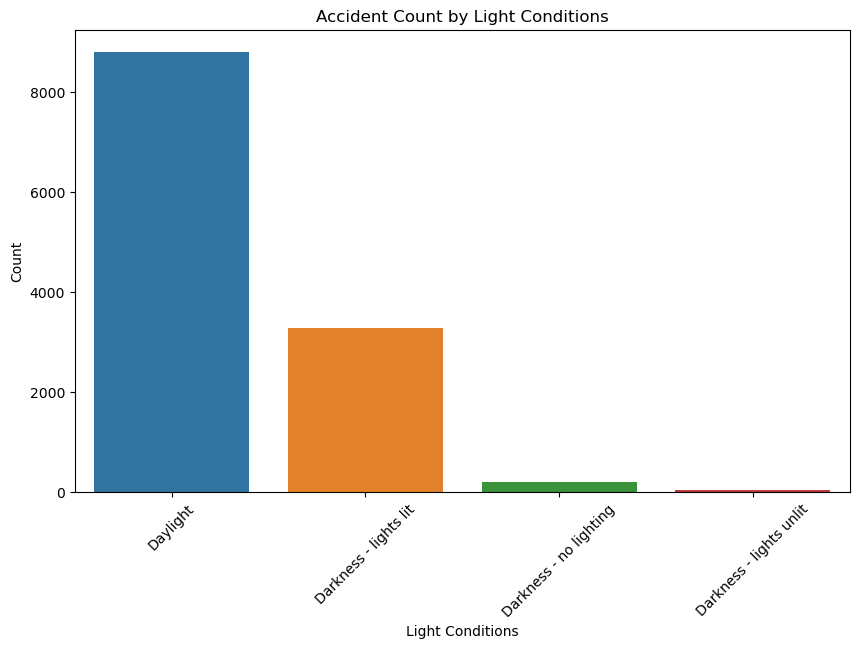

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Light_conditions', data=df)
plt.title('Accident Count by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


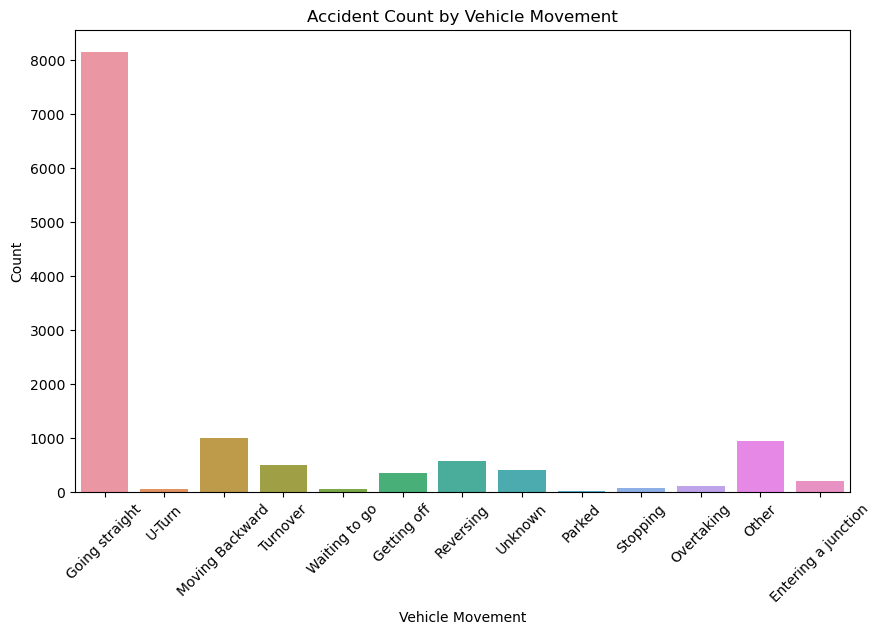

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_movement', data=df)
plt.title('Accident Count by Vehicle Movement')
plt.xlabel('Vehicle Movement')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


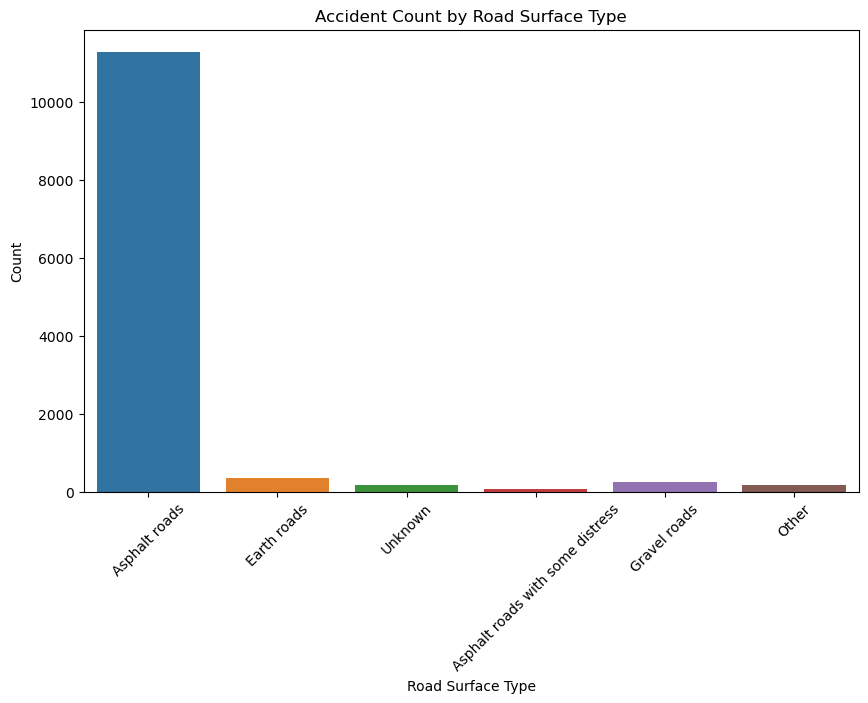

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_surface_type', data=df)
plt.title('Accident Count by Road Surface Type')
plt.xlabel('Road Surface Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


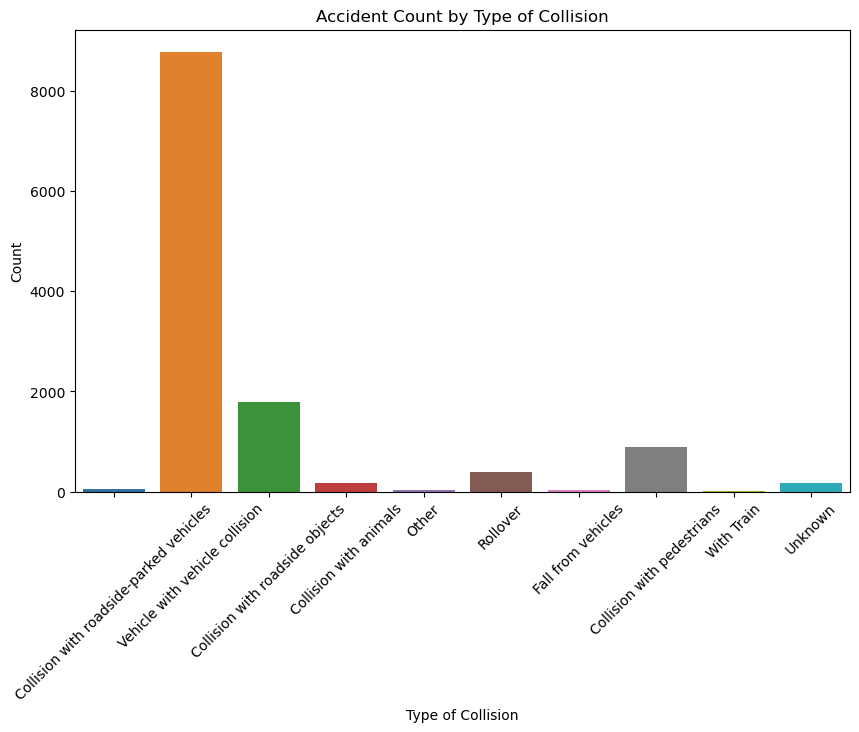

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_collision', data=df)
plt.title('Accident Count by Type of Collision')
plt.xlabel('Type of Collision')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [94]:
import joblib
joblib.dump(model, "LR.sav")
joblib.dump(model1, "KNN.sav")
joblib.dump(model2, "NB.sav")

['NB.sav']